In [1]:
using OPFRecourse, Gurobi, Distributions, Plots

In [2]:
data_file = string(Pkg.dir(),"/OPFRecourse/test/data/pglib-opf/pglib_opf_case300_ieee.m")
@time ref = [OPFRecourse.NetworkReference(data_file, σscaling=0.01*i) for i in 1:5];

  7.431996 seconds (4.65 M allocations: 265.230 MiB, 3.77% gc time)


In [3]:
srand(1234)
scenarios = [OPFRecourse.OPFScenarios(ref[i], nsamples = 10_000) for i in 1:5];

Academic license - for non-commercial use only


Progress: 100%|█████████████████████████████████████████| Time: 0:02:08


Academic license - for non-commercial use only


Progress: 100%|█████████████████████████████████████████| Time: 0:01:59


Academic license - for non-commercial use only


Progress: 100%|█████████████████████████████████████████| Time: 0:02:04


Academic license - for non-commercial use only


Progress:   1%|                                         |  ETA: 0:02:31WARNING: Not solved to optimality, status: Infeasible
Progress:  50%|████████████████████                     |  ETA: 0:01:08WARNING: Not solved to optimality, status: Infeasible
Progress:  68%|████████████████████████████             |  ETA: 0:00:43WARNING: Not solved to optimality, status: Infeasible
Progress:  70%|█████████████████████████████            |  ETA: 0:00:40WARNING: Not solved to optimality, status: Infeasible
Progress: 100%|█████████████████████████████████████████| Time: 0:02:15


Academic license - for non-commercial use only


Progress:   1%|█                                        |  ETA: 0:02:26WARNING: Not solved to optimality, status: Infeasible
Progress:   6%|██                                       |  ETA: 0:02:21WARNING: Not solved to optimality, status: Infeasible
Progress:   8%|███                                      |  ETA: 0:02:15WARNING: Not solved to optimality, status: Infeasible
Progress:  16%|██████                                   |  ETA: 0:02:01WARNING: Not solved to optimality, status: Infeasible
Progress:  24%|██████████                               |  ETA: 0:01:47WARNING: Not solved to optimality, status: Infeasible
Progress:  27%|███████████                              |  ETA: 0:01:42WARNING: Not solved to optimality, status: Infeasible
Progress:  28%|███████████                              |  ETA: 0:01:41WARNING: Not solved to optimality, status: Infeasible
Progress:  29%|████████████                             |  ETA: 0:01:39WARNING: Not solved to optimality, status: Infeasible



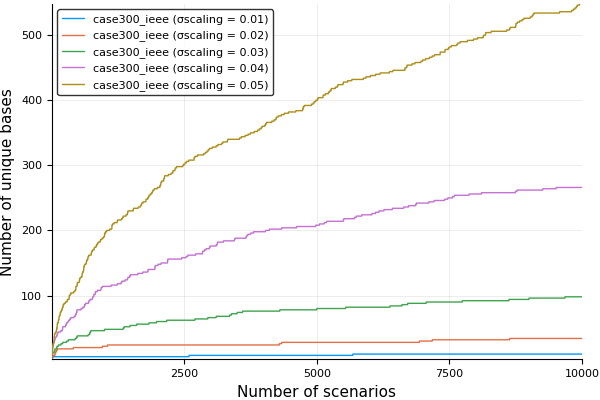

In [4]:
plot(
    [
        length(unique(scenarios[1].whichbasis[1:j,:],1))
        for j in 1:size(scenarios[1].scenarios,1)
    ],
    ylabel="Number of unique bases",
    xlabel="Number of scenarios",
    label="case300_ieee (σscaling = 0.01)"
)
for i in 2:4
    plot!(
        [
            length(unique(scenarios[i].whichbasis[1:j,:],1))
            for j in 1:size(scenarios[i].scenarios,1)
        ],
        ylabel="Number of unique bases",
        xlabel="Number of scenarios",
        label="case300_ieee (σscaling = 0.0$i)"
    )
end
plot!(
    [
        length(unique(scenarios[5].whichbasis[1:j,:],1))
        for j in 1:size(scenarios[5].scenarios,1)
    ],
    ylabel="Number of unique bases",
    xlabel="Number of scenarios",
    label="case300_ieee (σscaling = 0.05)"
)

In [5]:
function scenario_p(scenarios, i)
    uniquescenarios = unique(scenarios.whichbasis[1:i,:],1)
    [length(scenarios.whichscenario[(uniquescenarios[b,1],uniquescenarios[b,2])]) for b in 1:size(uniquescenarios,1)]
end

scenario_p (generic function with 1 method)


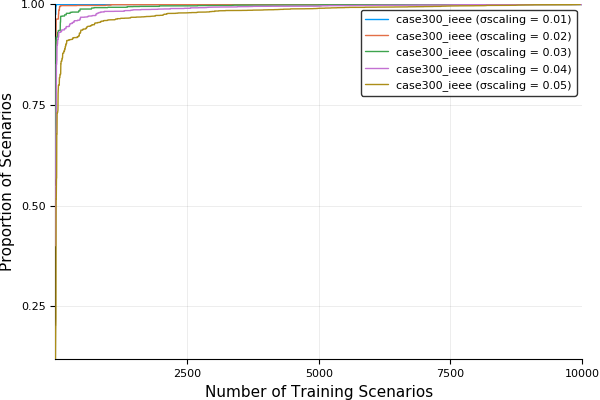

In [8]:
plot(
    [sum(scenario_p(scenarios[1], i)) for i in 1:size(scenarios[1].scenarios,1)] ./ size(scenarios[1].scenarios,1),
    ylabel="Proportion of Scenarios",
    xlabel="Number of Training Scenarios",
    label="case300_ieee (σscaling = 0.01)"
)
for j in 2:4
    plot!(
        [sum(scenario_p(scenarios[j], i)) for i in 1:size(scenarios[j].scenarios,1)] ./ size(scenarios[j].scenarios,1),
        ylabel="Proportion of Scenarios",
        xlabel="Number of Training Scenarios",
        label="case300_ieee (σscaling = 0.0$j)"
    )
end
plot!(
    [sum(scenario_p(scenarios[5], i)) for i in 1:size(scenarios[5].scenarios,1)] ./ size(scenarios[5].scenarios,1),
    ylabel="Proportion of Scenarios",
    xlabel="Number of Training Scenarios",
    label="case300_ieee (σscaling = 0.05)"
)


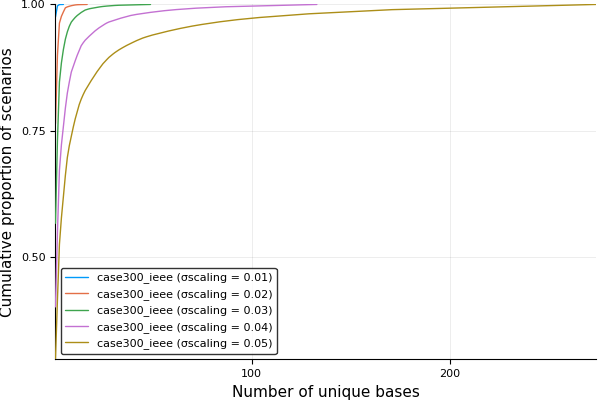

In [9]:
basiscounts = sort!(map(length, values(scenarios[1].whichscenario)), rev=true)
plot(
    cumsum(basiscounts) / sum(basiscounts),
    xlabel="Number of unique bases",
    ylabel="Cumulative proportion of scenarios",
    label="case300_ieee (σscaling = 0.01)"
)
for j in 2:4
    basiscounts = sort!(map(length, values(scenarios[j].whichscenario)), rev=true)
    plot!(
        cumsum(basiscounts) / sum(basiscounts),
        xlabel="Number of unique bases",
        ylabel="Cumulative proportion of scenarios",
        label="case300_ieee (σscaling = 0.0$j)"
    )
end
basiscounts = sort!(map(length, values(scenarios[5].whichscenario)), rev=true)
plot!(
    cumsum(basiscounts) / sum(basiscounts),
    xlabel="Number of unique bases",
    ylabel="Cumulative proportion of scenarios",
    label="case300_ieee (σscaling = 0.05)"
)